# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Trimo Agus Safitriyono
- **Email:** a548ybf485@devacademy.id
- **ID Dicoding:** trimoaguss

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penyewaan sepeda secara harian?
- Bagaimana perbandingan jumlah penyewaan sepeda antara hari libur dengan hari biasa?
- Bagaimana perbandingan jumlah penyewaan sepeda berdasarkan musim?

## Import Semua Packages/Library yang Digunakan

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [5]:
#Memuat Dataset Bike Sharing
url1 = 'https://raw.githubusercontent.com/TrimoA/Dataset-Analisis-Data/refs/heads/main/day.csv'
url2 = 'https://raw.githubusercontent.com/TrimoA/Dataset-Analisis-Data/refs/heads/main/hour.csv'
day_df = pd.read_csv(url1)
hour_df = pd.read_csv(url2)


**Insight:**
- Terdapat dua data set yang digunakan untuk menganalisis dataset bike sharing.

### Assessing Data

In [ ]:
#Menilai Data day_df
day_df.info()
##Mencari missing data
day_df.isna().sum()
##Mencari duplikasi data
print('Jumlah duplikasi: ', day_df.duplicated().sum())

#Menilai Data hour_df
hour_df.info()
##Mencari missing data
hour_df.isna().sum()
##mencari duplikasi data
print('Jumlah duplikasi: ', hour_df.duplicated().sum())

**Insight:**
- Hasil assesing data menunjukkan data set memiliki jumlah yang sama pada setiap variabelnya.
- Tidak ada data yang terduplikasi.

### Cleaning Data

**Insight:**
- Karena tidak terdapat data yang missing atau data yang tidak sesuai maka tidak dilakukan Cleaning data.

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
#Eksplorasi Data
print(day_df.describe())
print(hour_df.describe())

**Insight:**
- Berdasarkan explorasi data secara statistika tidak ditemukan data yang ambigu sehingga dapat dilanjtkan untuk memvisualisasikan data.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

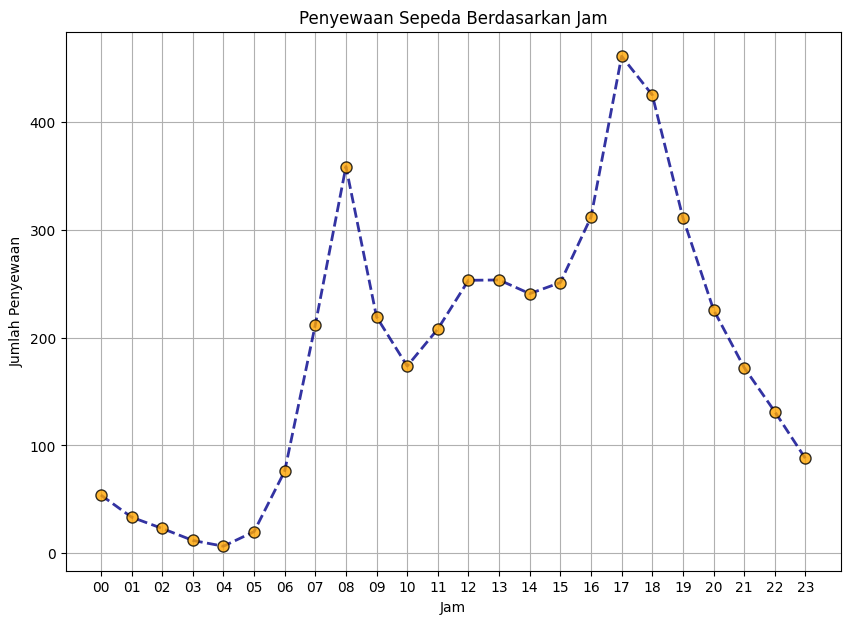

In [30]:
#Analisis tren penyewaan sepeda secara harian menggunakan plot dan garis
hourly_rentals = hour_df.groupby('hr')['cnt'].mean()
plt.figure(figsize=(10,7))
hourly_rentals.index = hourly_rentals.index.astype(str).str.zfill(2)
plt.plot(hourly_rentals.index, hourly_rentals.values, marker='o', markersize=8,
         markerfacecolor='#FFA500', markeredgecolor='#000000', linestyle='--',
         linewidth=2, color='#00008B', alpha=0.8, label='Hourly Rentals')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.title('Penyewaan Sepeda Berdasarkan Jam')
plt.grid()
plt.show()

**Insight:**
- Berdasarkan analisis data menunjukan bahwa tren penyewaan sepeda harian memiliki jumlah penyewaan yang tinggi pada pagi hari pukul 08.00 dan pada sore hari pukul 17.00.

### Pertanyaan 2:

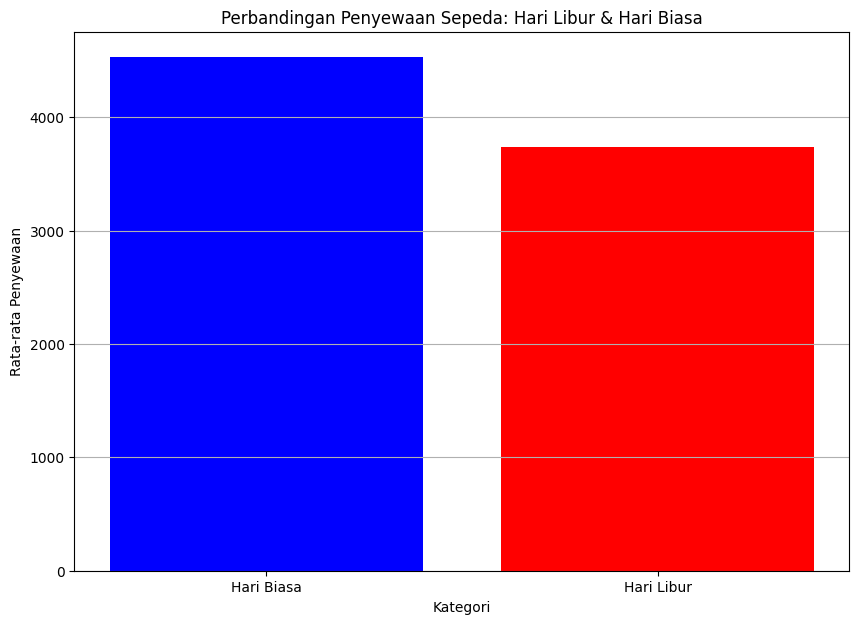

In [31]:
#Analisis hari libur dan hari biasa dengan diagram batang
holiday_rentals = day_df.groupby('holiday')['cnt'].mean()
holiday_labels = {0: 'Hari Biasa', 1: 'Hari Libur'}
plt.figure(figsize=(10,7))
plt.bar(holiday_rentals.index, holiday_rentals.values, tick_label=[holiday_labels[h] for h in holiday_rentals.index], color=['blue', 'red'])
plt.xlabel('Kategori')
plt.ylabel('Rata-rata Penyewaan')
plt.title('Perbandingan Penyewaan Sepeda: Hari Libur & Hari Biasa')
plt.grid(axis='y')
plt.show()

**Insight:**
- Berdasarkan analisis data menunjukkan bahwa penyewaan sepeda pada hari biasa memiliki jumlah yang lebih banyak dibandingkan penyewaan sepeda pada hari libur.

###Pertanyaan 3

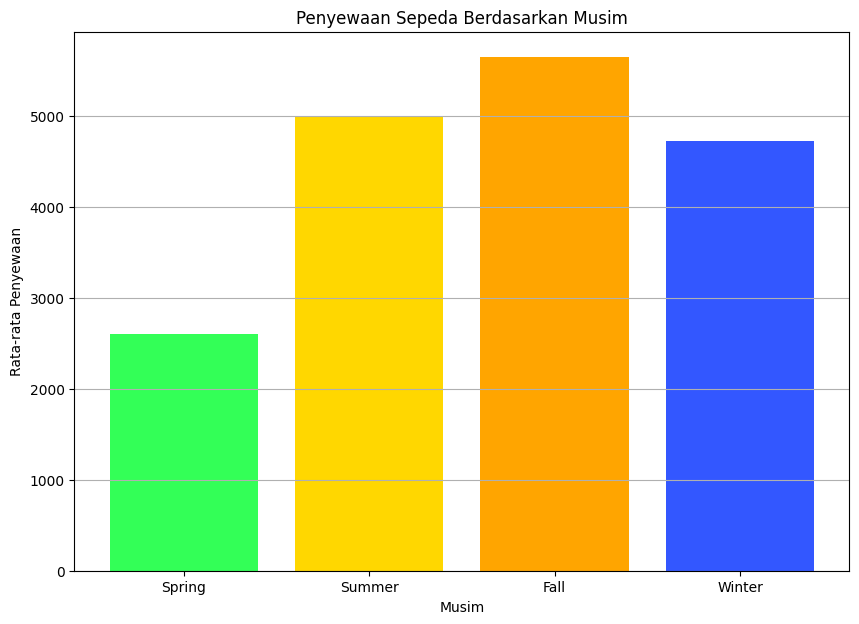

In [32]:
#Analisis penyewaan berdasarkan musim dengan diagram batang
seasonal_rentals = day_df.groupby('season')['cnt'].mean()
season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
colors = ['#33FF57', '#FFD700', '#FFA500', '#3357FF']
plt.figure(figsize=(10,7))
plt.bar(seasonal_rentals.index, seasonal_rentals.values, tick_label=[season_labels[s] for s in seasonal_rentals.index],color=colors)
plt.xlabel('Musim')
plt.ylabel('Rata-rata Penyewaan')
plt.title('Penyewaan Sepeda Berdasarkan Musim')
plt.grid(axis='y')
plt.show()


**insight:**
- Berdasarkan grafik analisis data penyewaan sepeda berdasarkan musim menunjukkan bahwa penyewaan sepeda secara berurutan dari yang paling banyak pada musim gugur (fall) dan yang paling sedikit pada musim semi (spring).

## Conclusion

- **Conclution pertanyaan 1:**
Berdasarkan analisis data menunjukan bahwa tren penyewaan sepeda harian memiliki jumlah penyewaan yang tinggi pada pagi hari pukul 08.00 dan pada sore hari pukul 17.00. Hal tersebut dapat dimungkinkan karena bertepatan dengan jam sibuk masuk dan pulang kerja atupun sekolah.
- **Conclution pertanyaan 2:**
Berdasarkan analisis data menunjukkan bahwa penyewaan sepeda pada hari biasa memiliki jumlah yang lebih banyak dibandingkan penyewaan sepeda pada hari libur.Hal ini mungkin terjadi karena orang-orang libur kerja dan tidak memerlukan penyewaan sepeda pada hari tersebut.
- **Conclution pertanyaan 2:**
Berdasarkan grafik analisis data penyewaan sepeda berdasarkan musim menunjukkan bahwa penyewaan sepeda secara berurutan dari yang paling banyak pada musim gugur (fall) dan yang paling sedikit pada musim semi (spring).